In [1]:
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  

In [17]:
import sklearn
print(sklearn.__version__)


1.6.1


In [18]:
!pip install -U scikit-learn



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


https://www.javatpoint.com/hierarchical-clustering-in-machine-learning

In [19]:
import matplotlib.pyplot as plt


In [4]:
dataset = pd.read_csv("D:\\data science QT\\notes\\DataSets\\house price prediction dataset.csv")  

In [5]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
x = dataset.iloc[:, [3, 4]].values 

In [8]:
import numpy as np

# Check for NaN
print("NaN values:", np.isnan(x).any())

# Check for infinity
print("Infinity values:", np.isinf(x).any())


NaN values: True
Infinity values: False


In [9]:
x = x[~np.isnan(x).any(axis=1)]  # Remove rows with NaN
x = x[~np.isinf(x).any(axis=1)]  # Remove rows with infinity


In [10]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # You can use "median" or "most_frequent" instead
x = imputer.fit_transform(x)


In [11]:
print("All finite values:", np.all(np.isfinite(x)))


All finite values: True


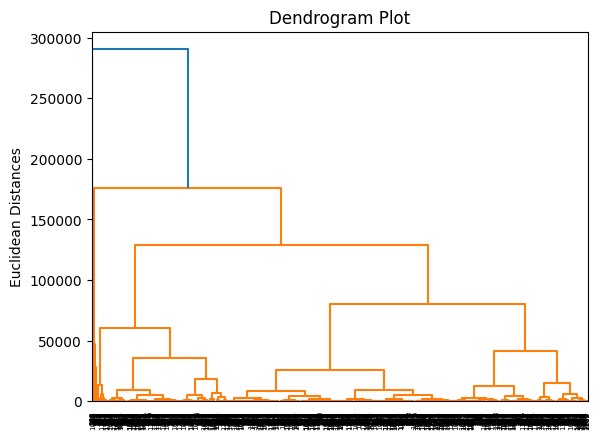

In [12]:
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
mtp.title("Dendrogram Plot")  
mtp.ylabel("Euclidean Distances")
mtp.show()


In [16]:
from sklearn.cluster import AgglomerativeClustering  

# Corrected code
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')  
y_pred = hc.fit_predict(x)


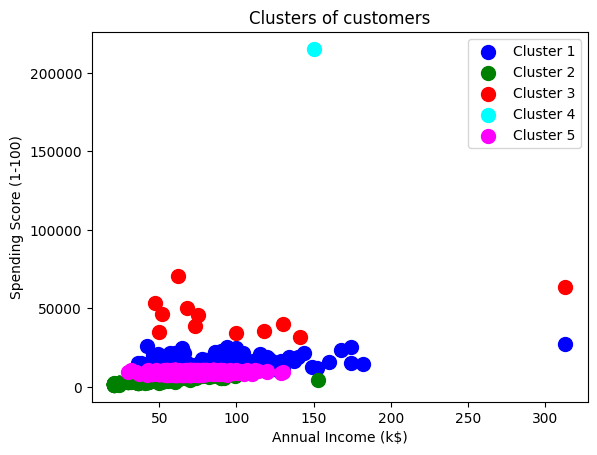

In [20]:
mtp.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
mtp.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
mtp.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
mtp.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
mtp.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')  
mtp.title('Clusters of customers')  
mtp.xlabel('Annual Income (k$)')  
mtp.ylabel('Spending Score (1-100)')  
mtp.legend()  
mtp.show()